In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
df=pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [9]:
df = df[["Rooms", "Bathroom", "Car", "Landsize", "BuildingArea", "Price"]].dropna()
df

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
1,2,1,0.0,156,79.0,1035000
2,3,2,0.0,134,150.0,1465000
4,4,1,2.0,120,142.0,1600000
6,3,2,0.0,245,210.0,1876000
7,2,1,2.0,256,107.0,1636000
...,...,...,...,...,...,...
13572,2,1,1.0,210,79.0,650000
13573,4,2,1.0,662,172.0,635000
13576,3,2,2.0,333,133.0,1031000
13578,4,1,5.0,866,157.0,2500000


In [11]:
X = df[["Rooms", "Bathroom", "Car", "Landsize", "BuildingArea"]].values
y = df["Price"].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
np.random.seed(42)
n_features = X_train.shape[1]
W = np.random.randn(n_features, 1)
b = 0

lr = 0.01
epochs = 100
loss_history = []

for epoch in range(epochs):
    y_pred = X_train @ W + b

    loss = np.mean((y_train - y_pred) ** 2)
    loss_history.append(loss)

    dW = -2 * X_train.T @ (y_train - y_pred) / len(y_train)
    db = -2 * np.mean(y_train - y_pred)

    W -= lr * dW
    b -= lr * db

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.2f}")

Epoch 0, Loss: 1637785878092.50
Epoch 10, Loss: 1171503252080.95
Epoch 20, Loss: 876889148802.78
Epoch 30, Loss: 687344533364.45
Epoch 40, Loss: 563858173246.30
Epoch 50, Loss: 482714722899.27
Epoch 60, Loss: 429081796838.42
Epoch 70, Loss: 393488925259.08
Epoch 80, Loss: 369800724867.53
Epoch 90, Loss: 354002474576.96


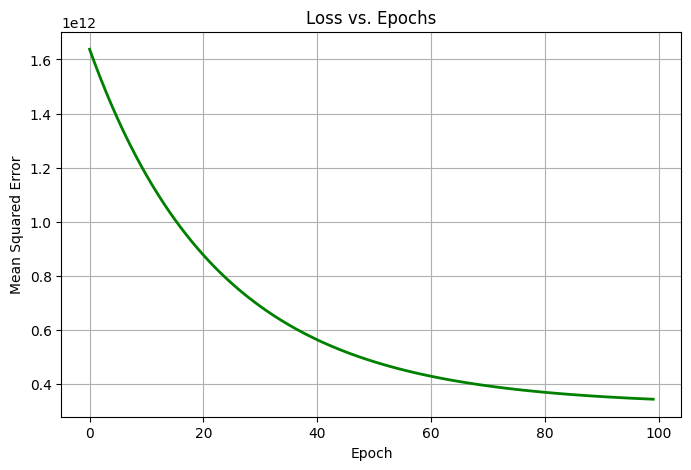

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history, color='green', linewidth=2)
plt.title("Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


In [17]:
y_test_pred = X_test @ W + b

comparison = pd.DataFrame({
    "Actual Price": y_test.flatten(),
    "Predicted Price": y_test_pred.flatten()
})

comparison.head(10)

,Actual Price,Predicted Price
0,1045000,1.516053e+06
1,275000,3.115548e+05
2,1480000,1.804082e+06
3,660000,1.473614e+06
4,580000,5.587440e+05
5,1595000,1.014041e+06
6,1400000,1.096322e+06
7,1367000,1.058901e+06
8,1088000,9.734746e+05
9,1965000,1.095424e+06
